## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.684724  0.277932 -1.816338 -1.328878  1.639544 -0.733089
1 -1.544163  0.941726  1.235781  1.428606  0.765901  0.627786
2  1.109937 -0.103036 -1.816867 -1.779851  0.933703  0.552739
3 -1.179530  0.744766  0.063957  1.358756 -0.325828  0.032377
4 -0.332398 -0.355457 -0.417712  0.268399  1.731149  0.188894


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0010925	total: 46.5ms	remaining: 46.5s
1:	learn: 0.9892446	total: 46.9ms	remaining: 23.4s
2:	learn: 0.9770884	total: 47.3ms	remaining: 15.7s
3:	learn: 0.9655886	total: 47.7ms	remaining: 11.9s
4:	learn: 0.9536145	total: 48ms	remaining: 9.56s
5:	learn: 0.9441359	total: 48.4ms	remaining: 8.01s
6:	learn: 0.9310105	total: 48.7ms	remaining: 6.91s
7:	learn: 0.9201746	total: 49ms	remaining: 6.08s
8:	learn: 0.9100836	total: 49.3ms	remaining: 5.43s
9:	learn: 0.9000456	total: 49.7ms	remaining: 4.92s
10:	learn: 0.8899369	total: 50.1ms	remaining: 4.5s
11:	learn: 0.8804658	total: 50.5ms	remaining: 4.16s
12:	learn: 0.8714260	total: 50.9ms	remaining: 3.86s
13:	learn: 0.8617299	total: 51.2ms	remaining: 3.61s
14:	learn: 0.8531533	total: 51.6ms	remaining: 3.38s
15:	learn: 0.8438876	total: 51.9ms	remaining: 3.19s
16:	learn: 0.8334163	total: 52.3ms	remaining: 3.02s
17:	learn: 0.8234022	total: 52.7ms	remaining: 2.87s
18:	learn: 0.8155383	total: 53ms	remaining: 2.73s

212:	learn: 0.1509466	total: 122ms	remaining: 452ms
213:	learn: 0.1497434	total: 123ms	remaining: 451ms
214:	learn: 0.1484091	total: 123ms	remaining: 450ms
215:	learn: 0.1471477	total: 124ms	remaining: 449ms
216:	learn: 0.1460535	total: 124ms	remaining: 447ms
217:	learn: 0.1447748	total: 124ms	remaining: 446ms
218:	learn: 0.1436632	total: 125ms	remaining: 445ms
219:	learn: 0.1425529	total: 125ms	remaining: 444ms
220:	learn: 0.1415634	total: 125ms	remaining: 442ms
221:	learn: 0.1404577	total: 126ms	remaining: 441ms
222:	learn: 0.1394493	total: 126ms	remaining: 439ms
223:	learn: 0.1385524	total: 126ms	remaining: 438ms
224:	learn: 0.1375697	total: 127ms	remaining: 437ms
225:	learn: 0.1366984	total: 127ms	remaining: 436ms
226:	learn: 0.1357170	total: 128ms	remaining: 434ms
227:	learn: 0.1346329	total: 128ms	remaining: 433ms
228:	learn: 0.1334650	total: 128ms	remaining: 432ms
229:	learn: 0.1326054	total: 129ms	remaining: 430ms
230:	learn: 0.1314280	total: 129ms	remaining: 429ms
231:	learn: 

484:	learn: 0.0343280	total: 225ms	remaining: 239ms
485:	learn: 0.0342527	total: 226ms	remaining: 239ms
486:	learn: 0.0340217	total: 226ms	remaining: 238ms
487:	learn: 0.0338956	total: 227ms	remaining: 238ms
488:	learn: 0.0336720	total: 227ms	remaining: 237ms
489:	learn: 0.0334542	total: 227ms	remaining: 237ms
490:	learn: 0.0332422	total: 228ms	remaining: 236ms
491:	learn: 0.0330844	total: 228ms	remaining: 236ms
492:	learn: 0.0328786	total: 228ms	remaining: 235ms
493:	learn: 0.0327251	total: 229ms	remaining: 234ms
494:	learn: 0.0325922	total: 229ms	remaining: 234ms
495:	learn: 0.0323934	total: 230ms	remaining: 233ms
496:	learn: 0.0323031	total: 230ms	remaining: 233ms
497:	learn: 0.0321706	total: 230ms	remaining: 232ms
498:	learn: 0.0320611	total: 231ms	remaining: 232ms
499:	learn: 0.0319731	total: 231ms	remaining: 231ms
500:	learn: 0.0319012	total: 232ms	remaining: 231ms
501:	learn: 0.0317103	total: 232ms	remaining: 230ms
502:	learn: 0.0315822	total: 232ms	remaining: 230ms
503:	learn: 

744:	learn: 0.0140043	total: 327ms	remaining: 112ms
745:	learn: 0.0139285	total: 327ms	remaining: 111ms
746:	learn: 0.0138954	total: 328ms	remaining: 111ms
747:	learn: 0.0138653	total: 328ms	remaining: 111ms
748:	learn: 0.0137861	total: 329ms	remaining: 110ms
749:	learn: 0.0137352	total: 329ms	remaining: 110ms
750:	learn: 0.0136731	total: 329ms	remaining: 109ms
751:	learn: 0.0135964	total: 330ms	remaining: 109ms
752:	learn: 0.0135361	total: 330ms	remaining: 108ms
753:	learn: 0.0134614	total: 330ms	remaining: 108ms
754:	learn: 0.0134168	total: 331ms	remaining: 107ms
755:	learn: 0.0133866	total: 331ms	remaining: 107ms
756:	learn: 0.0133430	total: 331ms	remaining: 106ms
757:	learn: 0.0132916	total: 332ms	remaining: 106ms
758:	learn: 0.0132619	total: 332ms	remaining: 105ms
759:	learn: 0.0132287	total: 332ms	remaining: 105ms
760:	learn: 0.0132021	total: 333ms	remaining: 105ms
761:	learn: 0.0131754	total: 333ms	remaining: 104ms
762:	learn: 0.0130746	total: 333ms	remaining: 104ms
763:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

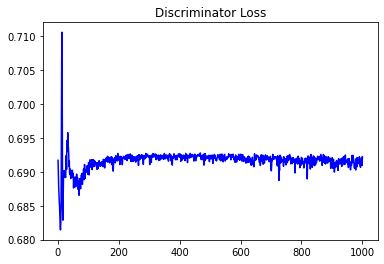

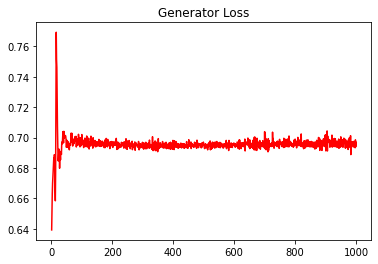

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06443785312232735


#### Sanity Checks 

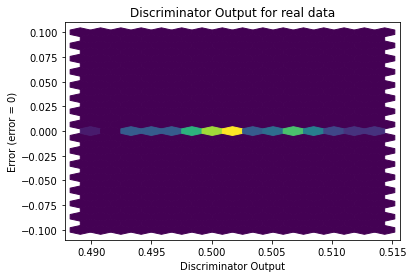

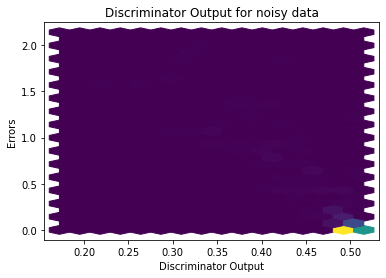

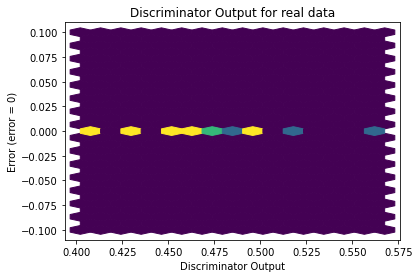

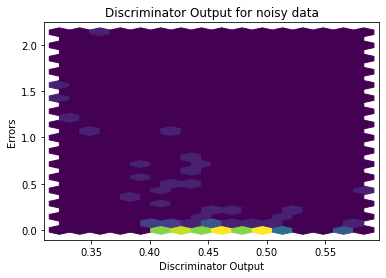

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


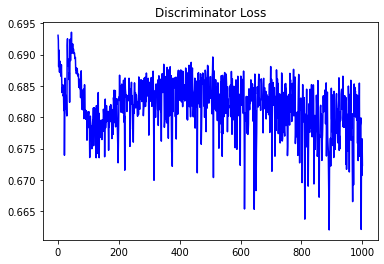

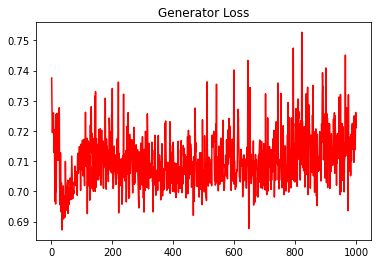

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05640458409536844


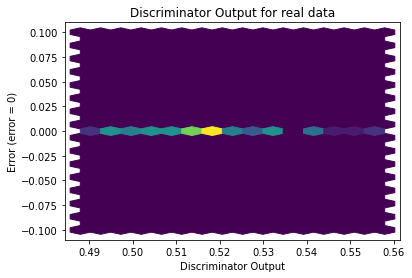

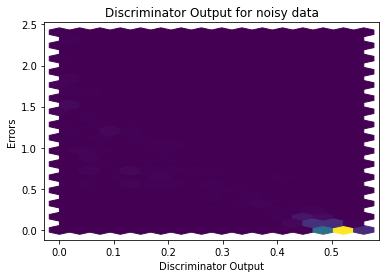

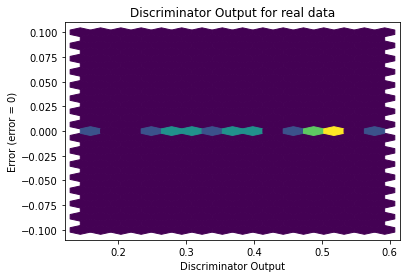

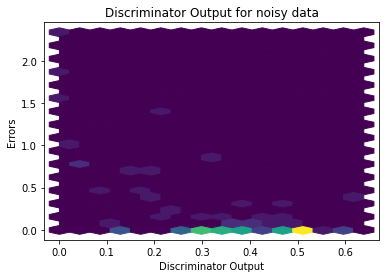

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1707]], device='cuda:0', requires_grad=True)
